# Texte

## Récupération données 

In [92]:
import pandas as pd

# Charger le fichier CSV
file_path = 'DB/flipkart.csv'
data = pd.read_csv(file_path)

# Afficher les 5 premières lignes
data.head()


,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


### Extraction de la catégorie

In [76]:
import pandas as pd
import re

# Extraire la première catégorie, si elle est présente
data['main_category'] = data['product_category_tree'].apply(
    lambda x: re.findall(r'^\["(.*?)\s*>>', x)[0] if pd.notnull(x) and re.findall(r'^\["(.*?)\s*>>', x) else None
)

# Afficher les 5 premières lignes pour vérifier le résultat
print(data[['product_category_tree', 'main_category']].head())


                               product_category_tree    main_category
0  ["Home Furnishing >> Curtains & Accessories >>...  Home Furnishing
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...        Baby Care
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...        Baby Care
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  Home Furnishing
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  Home Furnishing


### Concaténation

In [98]:
import pandas as pd
import re

# Supposons que 'data' est déjà chargé en tant que DataFrame
# Extraire la première catégorie, si elle est présente
data['main_category'] = data['product_category_tree'].apply(
    lambda x: re.findall(r'^\["(.*?)\s*>>', x)[0] if pd.notnull(x) and re.findall(r'^\["(.*?)\s*>>', x) else None
)

# Concaténer 'product_name' et 'description' dans une nouvelle colonne 'product_info'
data['product_info'] = data['product_name'].fillna('') + ' ' + data['description'].fillna('')

# Afficher les 5 premières lignes pour vérifier les résultats
print(data[['product_category_tree', 'main_category']].head())
print(data['product_info'].head())


                               product_category_tree    main_category
0  ["Home Furnishing >> Curtains & Accessories >>...  Home Furnishing
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...        Baby Care
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...        Baby Care
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  Home Furnishing
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  Home Furnishing
0    Elegance Polyester Multicolor Abstract Eyelet ...
1    Sathiyas Cotton Bath Towel Specifications of S...
2    Eurospa Cotton Terry Face Towel Set Key Featur...
3    SANTOSH ROYAL FASHION Cotton Printed King size...
4    Jaipur Print Cotton Floral King sized Double B...
Name: product_info, dtype: object


### Pré-traitement

In [100]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Télécharger les stopwords et lemmatiser
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialiser les stopwords en anglais et le lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Fonction de pré-traitement
def preprocess_text(text):
    # Mettre en minuscules
    text = text.lower()
    
    # Supprimer la ponctuation et conserver seulement les caractères alphanumériques
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Supprimer les stopwords et appliquer la lemmatisation
    text = ' '.join(
        lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words
    )
    
    return text

# Appliquer le pré-traitement à la colonne 'product_info'
data['product_info_clean'] = data['product_info'].apply(preprocess_text)

# Afficher les 5 premières lignes pour vérifier le résultat
print(data[['product_info', 'product_info_clean']].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kevinroualec/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kevinroualec/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/kevinroualec/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


                                        product_info  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1  Sathiyas Cotton Bath Towel Specifications of S...   
2  Eurospa Cotton Terry Face Towel Set Key Featur...   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                                  product_info_clean  
0  elegance polyester multicolor abstract eyelet ...  
1  sathiyas cotton bath towel specification sathi...  
2  eurospa cotton terry face towel set key featur...  
3  santosh royal fashion cotton printed king size...  
4  jaipur print cotton floral king sized double b...  


### N mots +/- Fréquents

In [28]:
from collections import Counter
from tabulate import tabulate

# Concaténer tous les mots de la colonne 'product_info_clean' en un seul texte
all_words = ' '.join(data['product_info_clean'].dropna()).split()

# Compter la fréquence de chaque mot
word_counts = Counter(all_words)

# Obtenir les 10 mots les plus fréquents
most_common_words = word_counts.most_common(50)

# Obtenir les 10 mots les moins fréquents
least_common_words = word_counts.most_common()[-50:]

# Afficher les mots les plus fréquents
print("Les mots les plus fréquents :")
print(tabulate(most_common_words, headers=["Mot", "Fréquence"], tablefmt="pipe"))

# Afficher les mots les moins fréquents
print("\nLes mots les moins fréquents :")
print(tabulate(least_common_words, headers=["Mot", "Fréquence"], tablefmt="pipe"))


Les mots les plus fréquents :
| Mot         |   Fréquence |
|:------------|------------:|
| r           |         918 |
| product     |         863 |
| cm          |         677 |
| free        |         616 |
| buy         |         582 |
| replacement |         568 |
| delivery    |         567 |
| genuine     |         564 |
| shipping    |         564 |
| cash        |         564 |
| price       |         559 |
| day         |         555 |
| mug         |         525 |
| watch       |         506 |
| flipkartcom |         472 |
| guarantee   |         471 |
| set         |         437 |
| baby        |         414 |
| feature     |         403 |
| online      |         396 |
| analog      |         382 |
| color       |         370 |
| cotton      |         341 |
| pack        |         331 |
| type        |         324 |
| girl        |         313 |
| showpiece   |         312 |
| material    |         307 |
| box         |         305 |
| ceramic     |         295 |
| design  

## Encodage

### Bag of words

#### Encodage

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Initialiser le vecteur de comptage des mots (Bag of Words)
vectorizer = CountVectorizer()

# Transformer la colonne 'product_info_clean' en une matrice de Bag of Words
bow_matrix = vectorizer.fit_transform(data['product_info_clean'].dropna())

# Convertir la matrice en DataFrame pour une meilleure lisibilité
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Afficher les 5 premières lignes
print(bow_df.head())


   aa  aaa  aapno  aari  aarika  ability  abklgrngrngrn  abklplplpnk  \
0   0    0      0     0       0        0              0            0   
1   0    0      0     0       0        0              0            0   
2   0    0      0     0       0        0              0            0   
3   0    0      0     0       0        0              0            0   
4   0    0      0     0       0        0              0            0   

   abklplpnkpnk  able  ...  zinc  zingalalaa  zip  zipexterior  zipper  \
0             0     0  ...     0           0    0            0       0   
1             0     0  ...     0           0    0            0       0   
2             0     0  ...     0           0    0            0       0   
3             0     0  ...     0           0    0            0       0   
4             0     0  ...     0           0    0            0       0   

   zippered  zone  zoom  zora  zyxel  
0         0     0     0     0      0  
1         0     0     0     0      0  
2    

#### Visualisation

                               product_category_tree    main_category
0  ["Home Furnishing >> Curtains & Accessories >>...  Home Furnishing
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...        Baby Care
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...        Baby Care
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  Home Furnishing
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  Home Furnishing
   Dimension 1  Dimension 2 Catégorie Principale
0    37.999767    -0.320355      Home Furnishing
1     4.675781    15.600509            Baby Care
2    -0.526203    15.127620            Baby Care
3    29.853447     8.242655      Home Furnishing
4    29.569712     7.768631      Home Furnishing


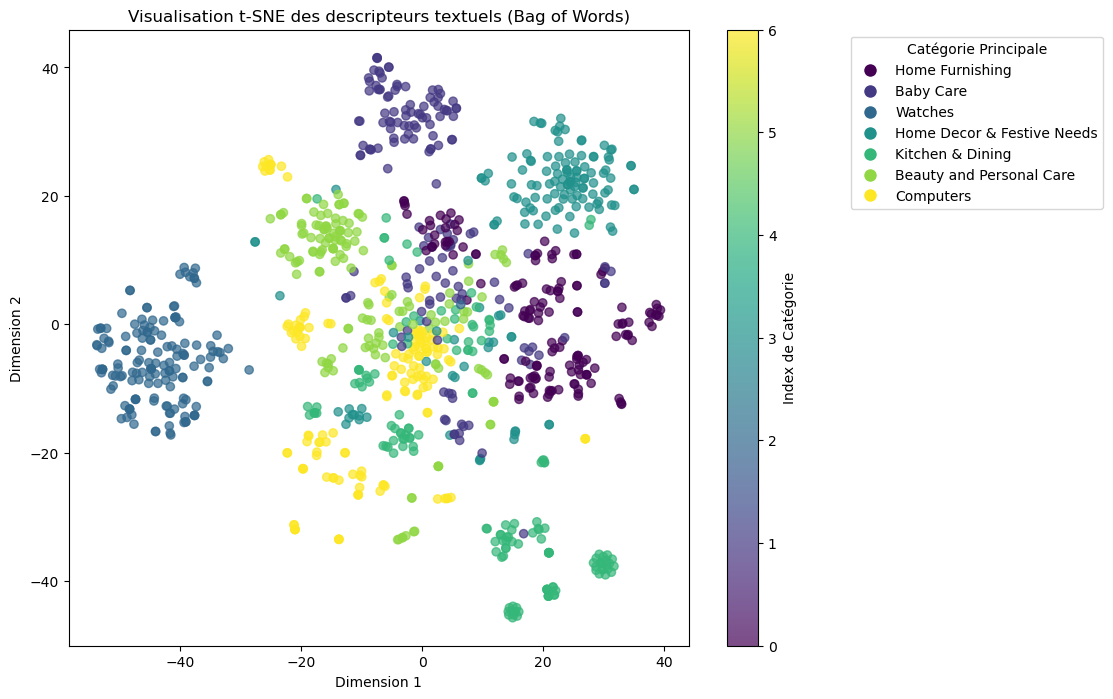

In [118]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

# Supposons que 'data' contient les colonnes 'product_info_clean' et 'product_category_tree'
# Extraire la première catégorie, si elle est présente
data['main_category'] = data['product_category_tree'].apply(
    lambda x: re.findall(r'^\["(.*?)\s*>>', x)[0] if pd.notnull(x) and re.findall(r'^\["(.*?)\s*>>', x) else None
)

# Vérifier que la colonne 'main_category' a été ajoutée correctement
print(data[['product_category_tree', 'main_category']].head())

# Initialiser le vecteur de comptage des mots (Bag of Words)
vectorizer = CountVectorizer()

# Transformer la colonne 'product_info_clean' en une matrice Bag of Words
bow_matrix = vectorizer.fit_transform(data['product_info_clean'].dropna())

# Appliquer t-SNE pour réduire la dimensionnalité
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(bow_matrix.toarray())

# Convertir les résultats t-SNE en DataFrame
tsne_df = pd.DataFrame(tsne_results, columns=['Dimension 1', 'Dimension 2'])

# Conserver les index pour aligner avec la catégorie principale
# Récupérer les index des lignes non nulles de 'product_info_clean'
non_null_index = data['product_info_clean'].dropna().index

# Ajouter la colonne 'main_category' à tsne_df en s'assurant que l'index correspond
tsne_df['Catégorie Principale'] = data['main_category'].loc[non_null_index].reset_index(drop=True)

# Vérifier si la colonne 'Catégorie Principale' a été ajoutée avec succès
print(tsne_df.head())

# Visualisation si la colonne 'Catégorie Principale' a été ajoutée avec succès
if 'Catégorie Principale' in tsne_df.columns:
    plt.figure(figsize=(10, 8))
    
    # Créer une palette de couleurs
    unique_categories = tsne_df['Catégorie Principale'].unique()
    category_colors = {category: idx for idx, category in enumerate(unique_categories)}
    
    # Colorer les points en fonction des catégories
    scatter = plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], 
                          c=tsne_df['Catégorie Principale'].map(category_colors), 
                          cmap='viridis', alpha=0.7)
    
    # Créer une légende à l'extérieur
    handles = [plt.Line2D([0], [0], marker='o', color='w', 
                           markerfacecolor=scatter.cmap(scatter.norm(category_colors[cat])), 
                           markersize=10) for cat in unique_categories]
    
    plt.legend(handles, unique_categories, title='Catégorie Principale', loc='upper left', bbox_to_anchor=(1.25, 1))
    
    plt.title('Visualisation t-SNE des descripteurs textuels (Bag of Words)')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.colorbar(scatter, label='Index de Catégorie')
    plt.show()
else:
    print("Impossible d'afficher la visualisation car la colonne 'Catégorie Principale' n'a pas été ajoutée.")


#### Kmeans


Meilleurs hyperparamètres : (7, 'k-means++', 3, 300, 0.0001, 'lloyd') avec un ARI de 0.25


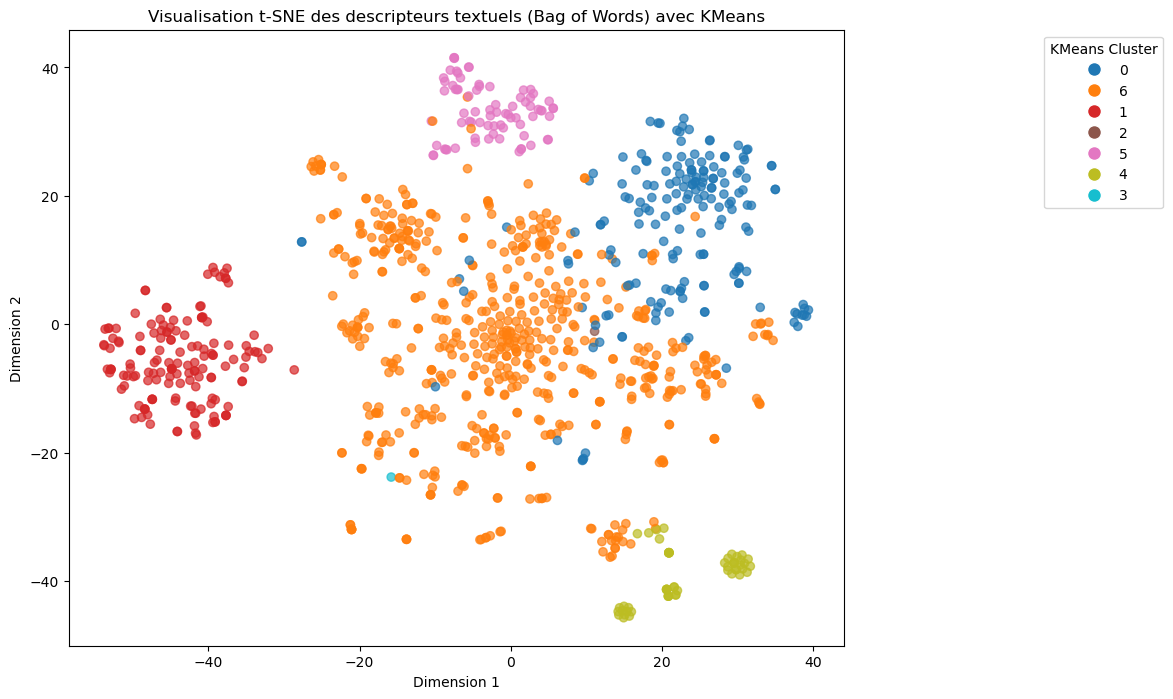

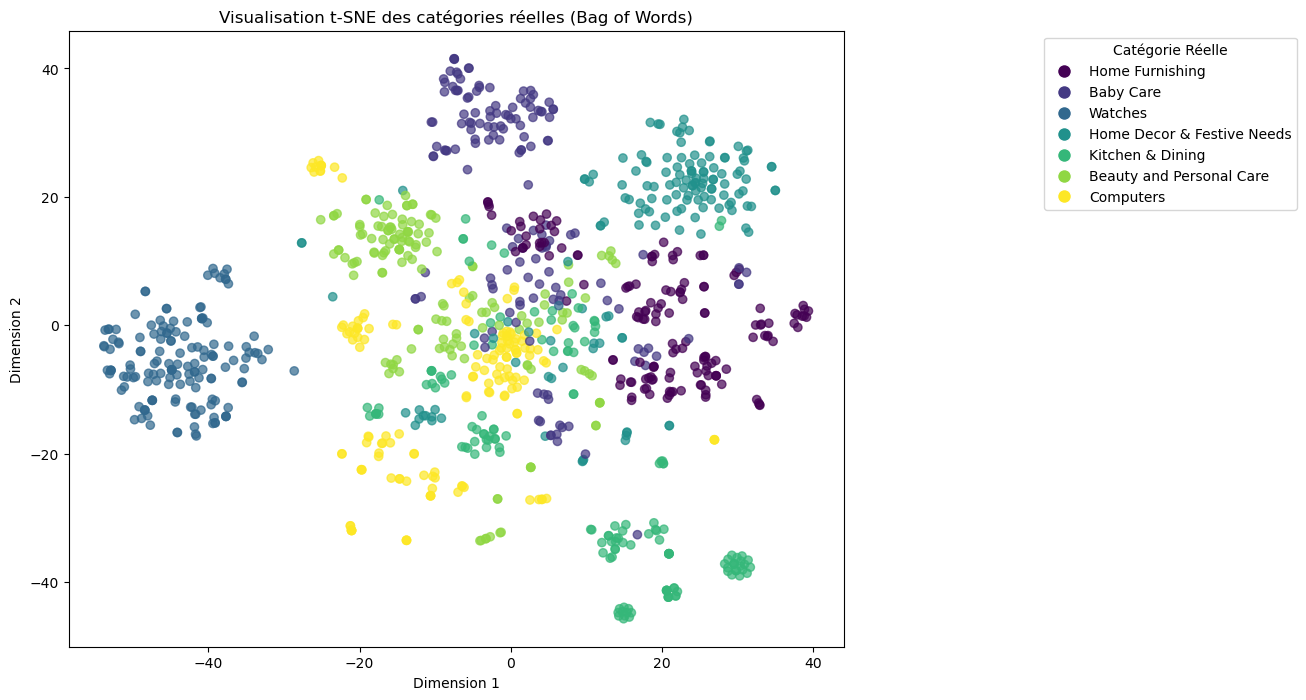

In [156]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import itertools
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Supposons que 'data' contient les colonnes 'product_info_clean' et 'product_category_tree'
# Extraire la première catégorie, si elle est présente
data['main_category'] = data['product_category_tree'].apply(
    lambda x: re.findall(r'^\["(.*?)\s*>>', x)[0] if pd.notnull(x) and re.findall(r'^\["(.*?)\s*>>', x) else None
)

# Initialiser le vecteur de comptage des mots (Bag of Words)
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(data['product_info_clean'].dropna())

# Récupérer les index des lignes non nulles pour aligner les catégories principales
non_null_index = data['product_info_clean'].dropna().index
clustered_df = pd.DataFrame()

# Définir la grille d'hyperparamètres
param_grid_kmeans = {
    'n_clusters': [7],
    'init': ['k-means++', 'random'],
    'n_init': [3, 2, 4],
    'max_iter': [300, 250],
    'tol': [1e-4, 1e-3,1e-2],
    'algorithm': ['lloyd', 'elkan']
}

# Créer toutes les combinaisons possibles d'hyperparamètres
param_combinations = list(itertools.product(
    param_grid_kmeans['n_clusters'],
    param_grid_kmeans['init'],
    param_grid_kmeans['n_init'],
    param_grid_kmeans['max_iter'],
    param_grid_kmeans['tol'],
    param_grid_kmeans['algorithm']
))

# Effectuer la recherche d'hyperparamètres
best_ari_score = -1
best_params = None

for params in param_combinations:
    n_clusters, init, n_init, max_iter, tol, algorithm = params
    kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init,
                    max_iter=max_iter, tol=tol, algorithm=algorithm, random_state=42)
    kmeans_labels = kmeans.fit_predict(bow_matrix)

    # Calculer l'ARI si les catégories réelles sont disponibles
    clustered_df['KMeans Cluster'] = kmeans_labels
    clustered_df['Catégorie Réelle'] = data['main_category'].loc[non_null_index].reset_index(drop=True)
    
    if clustered_df['Catégorie Réelle'].notnull().all():
        ari_score = adjusted_rand_score(clustered_df['Catégorie Réelle'], clustered_df['KMeans Cluster'])
        if ari_score > best_ari_score:
            best_ari_score = ari_score
            best_params = params

print(f"\nMeilleurs hyperparamètres : {best_params} avec un ARI de {best_ari_score:.2f}")

# Appliquer le meilleur modèle KMeans avec les meilleurs hyperparamètres trouvés
n_clusters, init, n_init, max_iter, tol, algorithm = best_params
kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init,
                max_iter=max_iter, tol=tol, algorithm=algorithm, random_state=42)
best_labels = kmeans.fit_predict(bow_matrix)

# Réduction de la dimensionnalité avec t-SNE pour la visualisation
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(bow_matrix.toarray())
tsne_df = pd.DataFrame(tsne_results, columns=['Dimension 1', 'Dimension 2'])
tsne_df['KMeans Cluster'] = best_labels
tsne_df['Catégorie Réelle'] = data['main_category'].loc[non_null_index].reset_index(drop=True)

# Graphique des clusters KMeans
plt.figure(figsize=(10, 8))
unique_clusters = tsne_df['KMeans Cluster'].unique()
cluster_colors = {cluster: idx for idx, cluster in enumerate(unique_clusters)}

scatter = plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], 
                      c=tsne_df['KMeans Cluster'].map(cluster_colors), cmap='tab10', alpha=0.7)

# Légende pour les clusters KMeans en dehors du graphique
handles = [plt.Line2D([0], [0], marker='o', color='w', 
                      markerfacecolor=scatter.cmap(scatter.norm(cluster_colors[cluster])), 
                      markersize=10) for cluster in unique_clusters]

plt.legend(handles, unique_clusters, title='KMeans Cluster', loc='upper left', bbox_to_anchor=(1.25, 1))
plt.title('Visualisation t-SNE des descripteurs textuels (Bag of Words) avec KMeans')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

# Graphique des catégories réelles
plt.figure(figsize=(10, 8))
unique_categories = tsne_df['Catégorie Réelle'].unique()
category_colors = {category: idx for idx, category in enumerate(unique_categories)}

scatter_real = plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], 
                           c=tsne_df['Catégorie Réelle'].map(category_colors), cmap='viridis', alpha=0.7)

# Légende pour les catégories réelles en dehors du graphique
handles_real = [plt.Line2D([0], [0], marker='o', color='w', 
                           markerfacecolor=scatter_real.cmap(scatter_real.norm(category_colors[cat])), 
                           markersize=10) for cat in unique_categories]

plt.legend(handles_real, unique_categories, title='Catégorie Réelle', loc='upper left', bbox_to_anchor=(1.25, 1))
plt.title('Visualisation t-SNE des catégories réelles (Bag of Words)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


### TF-IDF 

#### Encodage 

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Initialiser le vecteur TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Transformer la colonne 'product_info_clean' en une matrice TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(data['product_info_clean'].dropna())

# Convertir la matrice en DataFrame pour une meilleure lisibilité
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Afficher les 5 premières lignes
print(tfidf_df.head())


    aa  aaa  aapno  aari  aarika  ability  abklgrngrngrn  abklplplpnk  \
0  0.0  0.0    0.0   0.0     0.0      0.0            0.0          0.0   
1  0.0  0.0    0.0   0.0     0.0      0.0            0.0          0.0   
2  0.0  0.0    0.0   0.0     0.0      0.0            0.0          0.0   
3  0.0  0.0    0.0   0.0     0.0      0.0            0.0          0.0   
4  0.0  0.0    0.0   0.0     0.0      0.0            0.0          0.0   

   abklplpnkpnk  able  ...  zinc  zingalalaa  zip  zipexterior  zipper  \
0           0.0   0.0  ...   0.0         0.0  0.0          0.0     0.0   
1           0.0   0.0  ...   0.0         0.0  0.0          0.0     0.0   
2           0.0   0.0  ...   0.0         0.0  0.0          0.0     0.0   
3           0.0   0.0  ...   0.0         0.0  0.0          0.0     0.0   
4           0.0   0.0  ...   0.0         0.0  0.0          0.0     0.0   

   zippered  zone  zoom  zora  zyxel  
0       0.0   0.0   0.0   0.0    0.0  
1       0.0   0.0   0.0   0.0    0.0  

#### Visualisation

                               product_category_tree    main_category
0  ["Home Furnishing >> Curtains & Accessories >>...  Home Furnishing
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...        Baby Care
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...        Baby Care
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  Home Furnishing
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  Home Furnishing
   Dimension 1  Dimension 2 Catégorie Principale
0    18.906862    -9.423239      Home Furnishing
1    19.708725    23.305073            Baby Care
2    18.188032    20.747856            Baby Care
3    26.231697    -9.562181      Home Furnishing
4    26.176857    -9.185416      Home Furnishing


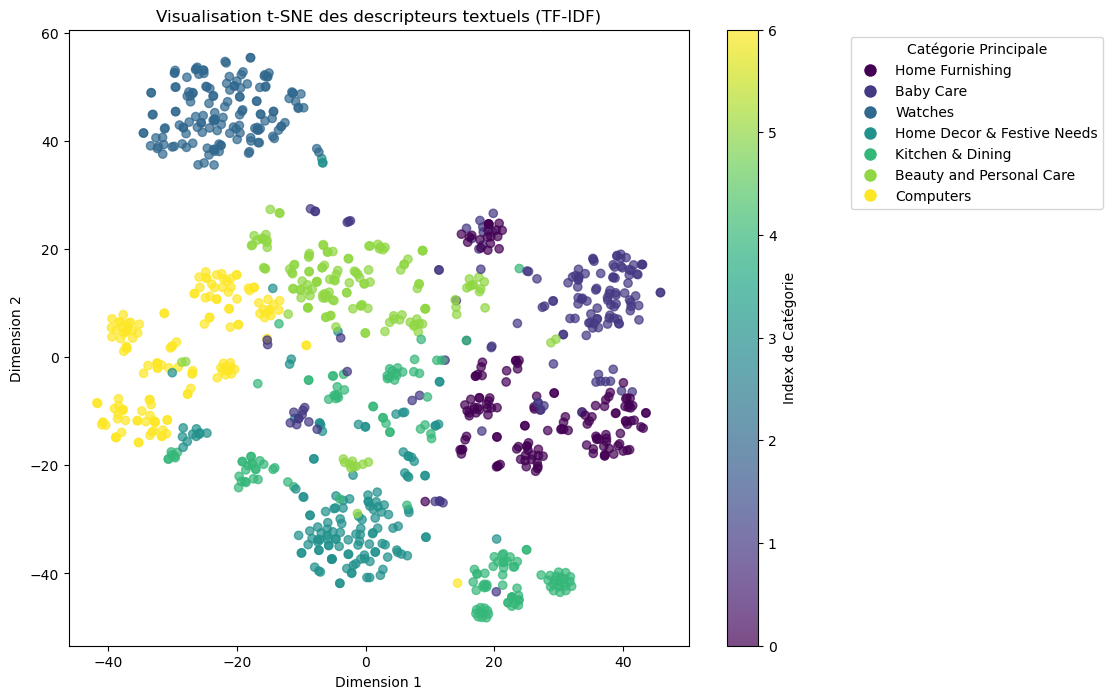

In [122]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE

# Supposons que 'data' contient les colonnes 'product_info_clean' et 'product_category_tree'
# Extraire la première catégorie, si elle est présente
data['main_category'] = data['product_category_tree'].apply(
    lambda x: re.findall(r'^\["(.*?)\s*>>', x)[0] if pd.notnull(x) and re.findall(r'^\["(.*?)\s*>>', x) else None
)

# Vérifier que la colonne 'main_category' a été ajoutée correctement
print(data[['product_category_tree', 'main_category']].head())

# Initialiser le vecteur TF-IDF
vectorizer = TfidfVectorizer()

# Transformer la colonne 'product_info_clean' en une matrice TF-IDF
tfidf_matrix = vectorizer.fit_transform(data['product_info_clean'].dropna())

# Appliquer t-SNE pour réduire la dimensionnalité
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(tfidf_matrix.toarray())

# Convertir les résultats t-SNE en DataFrame
tsne_df = pd.DataFrame(tsne_results, columns=['Dimension 1', 'Dimension 2'])

# Conserver les index pour aligner avec la catégorie principale
# Récupérer les index des lignes non nulles de 'product_info_clean'
non_null_index = data['product_info_clean'].dropna().index

# Ajouter la colonne 'main_category' à tsne_df en s'assurant que l'index correspond
tsne_df['Catégorie Principale'] = data['main_category'].loc[non_null_index].reset_index(drop=True)

# Vérifier si la colonne 'Catégorie Principale' a été ajoutée avec succès
print(tsne_df.head())

# Visualisation si la colonne 'Catégorie Principale' a été ajoutée avec succès
if 'Catégorie Principale' in tsne_df.columns:
    plt.figure(figsize=(10, 8))
    
    # Créer une palette de couleurs
    unique_categories = tsne_df['Catégorie Principale'].unique()
    category_colors = {category: idx for idx, category in enumerate(unique_categories)}
    
    # Colorer les points en fonction des catégories
    scatter = plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], 
                          c=tsne_df['Catégorie Principale'].map(category_colors), 
                          cmap='viridis', alpha=0.7)
    
    # Créer une légende à l'extérieur
    handles = [plt.Line2D([0], [0], marker='o', color='w', 
                           markerfacecolor=scatter.cmap(scatter.norm(category_colors[cat])), 
                           markersize=10) for cat in unique_categories]
    
    plt.legend(handles, unique_categories, title='Catégorie Principale', loc='upper left', bbox_to_anchor=(1.25, 1))
    
    plt.title('Visualisation t-SNE des descripteurs textuels (TF-IDF)')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.colorbar(scatter, label='Index de Catégorie')
    plt.show()
else:
    print("Impossible d'afficher la visualisation car la colonne 'Catégorie Principale' n'a pas été ajoutée.")


#### Kmeans

Indice de Rand ajusté (ARI) : 0.31


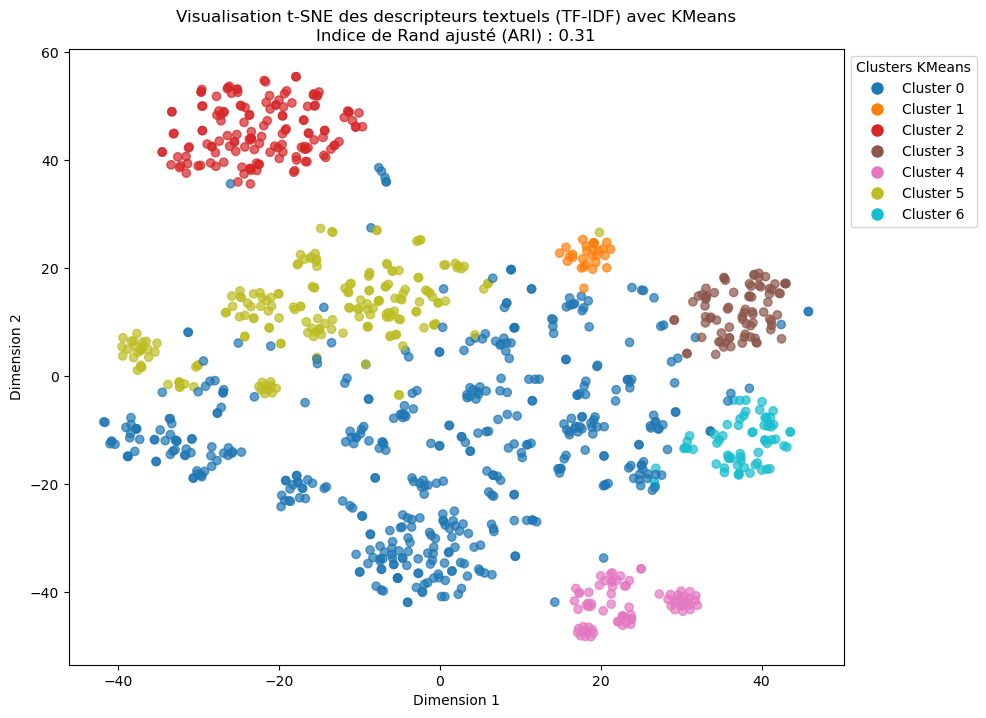

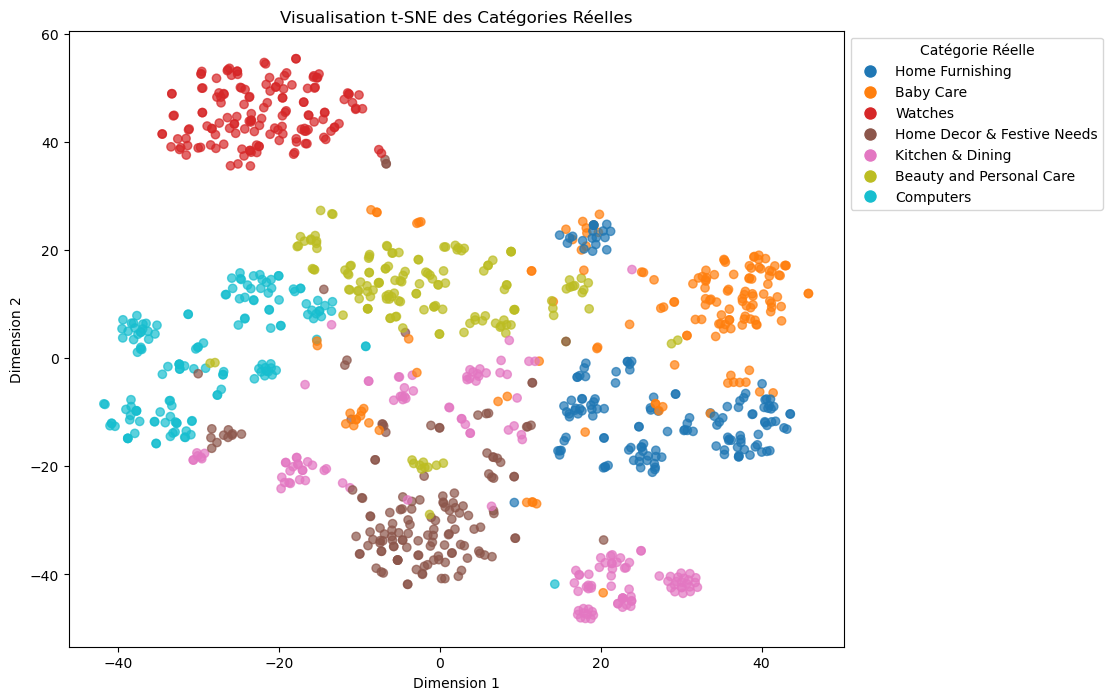

In [141]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Supposons que 'data' contient les colonnes 'product_info_clean' et 'product_category_tree'
# Extraire la première catégorie, si elle est présente
data['main_category'] = data['product_category_tree'].apply(
    lambda x: re.findall(r'^\["(.*?)\s*>>', x)[0] if pd.notnull(x) and re.findall(r'^\["(.*?)\s*>>', x) else None
)

# Initialiser le vecteur TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data['product_info_clean'].dropna())

# Effectuer le clustering KMeans en définissant explicitement `n_init`
kmeans = KMeans(n_clusters=7, n_init=10, random_state=42)  # ajustez `n_clusters` si nécessaire
kmeans_labels = kmeans.fit_predict(tfidf_matrix)

# Créer un DataFrame avec les résultats du clustering
non_null_index = data['product_info_clean'].dropna().index
clustered_df = pd.DataFrame({
    'KMeans Cluster': kmeans_labels,
    'Catégorie Réelle': data['main_category'].loc[non_null_index].reset_index(drop=True)
})

# Calculer l'indice de Rand ajusté (ARI) entre les labels KMeans et les catégories réelles
if clustered_df['Catégorie Réelle'].notnull().all():
    ari_score = adjusted_rand_score(clustered_df['Catégorie Réelle'], clustered_df['KMeans Cluster'])
    print(f"Indice de Rand ajusté (ARI) : {ari_score:.2f}")
else:
    print("Certaines catégories réelles sont manquantes, ce qui peut affecter le calcul de l'ARI.")

# Réduction de la dimensionnalité avec t-SNE pour la visualisation
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(tfidf_matrix.toarray())
tsne_df = pd.DataFrame(tsne_results, columns=['Dimension 1', 'Dimension 2'])
tsne_df['KMeans Cluster'] = kmeans_labels
tsne_df['Catégorie Réelle'] = data['main_category'].loc[non_null_index].reset_index(drop=True)

# Visualisation du clustering KMeans avec légende en dehors du graphique
plt.figure(figsize=(10, 8))
unique_clusters = tsne_df['KMeans Cluster'].unique()
cluster_colors = {cluster: idx for idx, cluster in enumerate(unique_clusters)}

scatter = plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], 
                      c=tsne_df['KMeans Cluster'].map(cluster_colors), cmap='tab10', alpha=0.7)

# Créer une légende pour les clusters KMeans
handles = [plt.Line2D([0], [0], marker='o', color='w', 
                      markerfacecolor=scatter.cmap(scatter.norm(cluster_colors[cluster])), markersize=10) 
           for cluster in unique_clusters]
plt.legend(handles, [f"Cluster {cluster}" for cluster in unique_clusters], 
           title='Clusters KMeans', loc='upper left', bbox_to_anchor=(1, 1))

plt.title(f'Visualisation t-SNE des descripteurs textuels (TF-IDF) avec KMeans\nIndice de Rand ajusté (ARI) : {ari_score:.2f}')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

# Visualisation des catégories réelles (facultatif pour comparaison)
plt.figure(figsize=(10, 8))
unique_categories = tsne_df['Catégorie Réelle'].unique()
category_colors = {category: idx for idx, category in enumerate(unique_categories)}

scatter = plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], 
                      c=tsne_df['Catégorie Réelle'].map(category_colors), cmap='tab10', alpha=0.7)

handles = [plt.Line2D([0], [0], marker='o', color='w', 
                      markerfacecolor=scatter.cmap(scatter.norm(category_colors[cat])), markersize=10) 
           for cat in unique_categories]
plt.legend(handles, unique_categories, title='Catégorie Réelle', loc='upper left', bbox_to_anchor=(1, 1))

plt.title('Visualisation t-SNE des Catégories Réelles')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()



Meilleurs hyperparamètres : (7, 'k-means++', 3, 300, 0.0001, 'lloyd') avec un ARI de 0.31


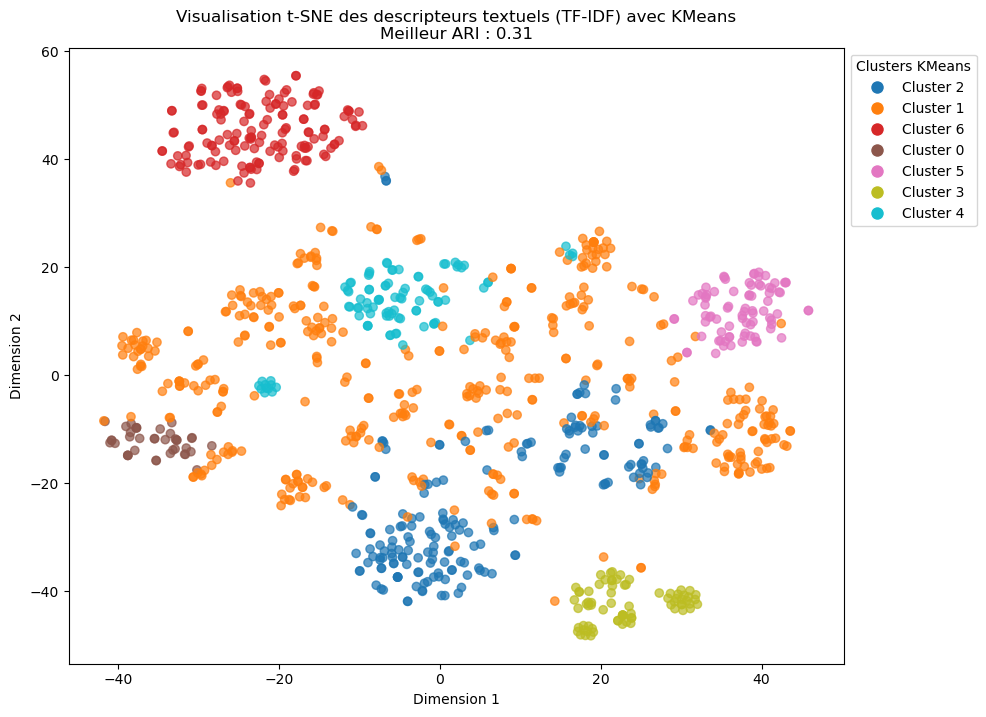

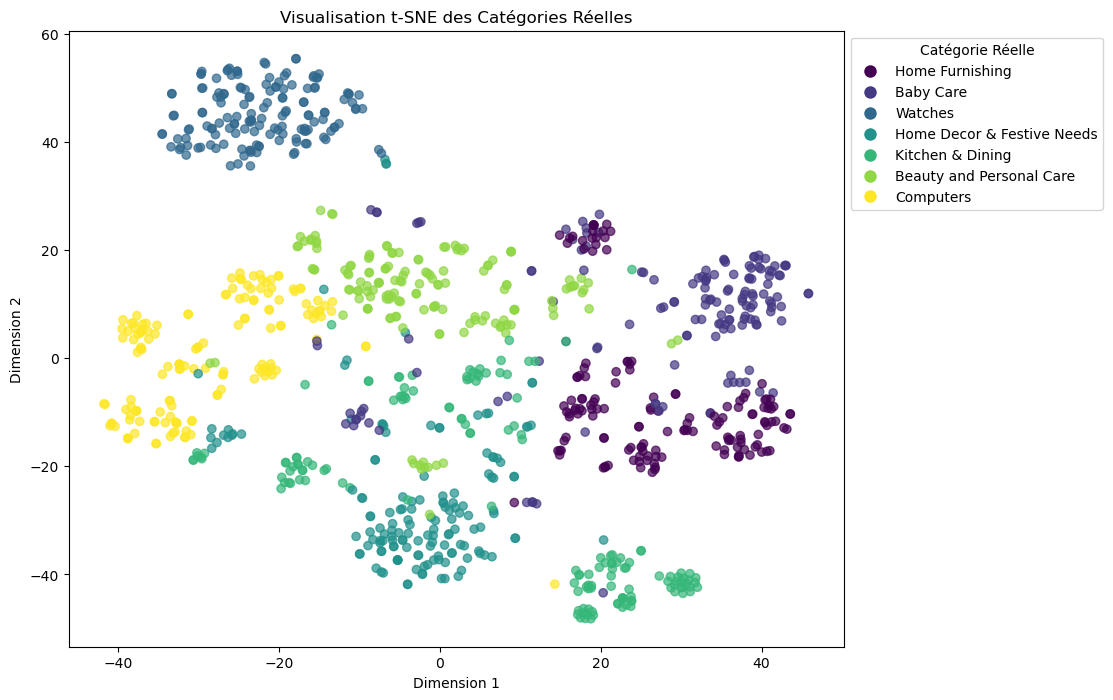

In [167]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import itertools

# Supposons que 'data' contient les colonnes 'product_info_clean' et 'product_category_tree'
# Extraire la première catégorie, si elle est présente
data['main_category'] = data['product_category_tree'].apply(
    lambda x: re.findall(r'^\["(.*?)\s*>>', x)[0] if pd.notnull(x) and re.findall(r'^\["(.*?)\s*>>', x) else None
)

# Initialiser le vecteur TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data['product_info_clean'].dropna())

# Préparer les hyperparamètres pour la recherche
param_grid_kmeans = {
    'n_clusters': [7],
    'init': ['k-means++', 'random'],
    'n_init': [3, 2, 4],
    'max_iter': [300, 275],
    'tol': [1e-4, 1e-3,1e-2],
    'algorithm': ['lloyd', 'elkan']
}

# Créer toutes les combinaisons possibles d'hyperparamètres
param_combinations = list(itertools.product(
    param_grid_kmeans['n_clusters'],
    param_grid_kmeans['init'],
    param_grid_kmeans['n_init'],
    param_grid_kmeans['max_iter'],
    param_grid_kmeans['tol'],
    param_grid_kmeans['algorithm']
))

# Variables pour stocker le meilleur ARI et ses hyperparamètres
best_ari_score = -1
best_params = None

# Effectuer la recherche d'hyperparamètres
for params in param_combinations:
    n_clusters, init, n_init, max_iter, tol, algorithm = params
    kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, 
                    max_iter=max_iter, tol=tol, algorithm=algorithm, random_state=42)
    kmeans_labels = kmeans.fit_predict(tfidf_matrix)
    
    # Calculer l'ARI si les catégories réelles sont disponibles
    non_null_index = data['product_info_clean'].dropna().index
    clustered_df = pd.DataFrame({
        'KMeans Cluster': kmeans_labels,
        'Catégorie Réelle': data['main_category'].loc[non_null_index].reset_index(drop=True)
    })
    
    if clustered_df['Catégorie Réelle'].notnull().all():
        ari_score = adjusted_rand_score(clustered_df['Catégorie Réelle'], clustered_df['KMeans Cluster'])
        if ari_score > best_ari_score:
            best_ari_score = ari_score
            best_params = params

print(f"\nMeilleurs hyperparamètres : {best_params} avec un ARI de {best_ari_score:.2f}")

# Appliquer KMeans avec les meilleurs hyperparamètres
n_clusters, init, n_init, max_iter, tol, algorithm = best_params
kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, 
                max_iter=max_iter, tol=tol, algorithm=algorithm, random_state=42)
best_labels = kmeans.fit_predict(tfidf_matrix)

# Réduction de la dimensionnalité avec t-SNE pour visualiser les résultats
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(tfidf_matrix.toarray())
tsne_df = pd.DataFrame(tsne_results, columns=['Dimension 1', 'Dimension 2'])
tsne_df['KMeans Cluster'] = best_labels
tsne_df['Catégorie Réelle'] = data['main_category'].loc[non_null_index].reset_index(drop=True)

# Visualisation des clusters KMeans
plt.figure(figsize=(10, 8))
unique_clusters = tsne_df['KMeans Cluster'].unique()
cluster_colors = {cluster: idx for idx, cluster in enumerate(unique_clusters)}

scatter = plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], 
                      c=tsne_df['KMeans Cluster'].map(cluster_colors), cmap='tab10', alpha=0.7)

# Légende pour les clusters KMeans
handles = [plt.Line2D([0], [0], marker='o', color='w', 
                      markerfacecolor=scatter.cmap(scatter.norm(cluster_colors[cluster])), 
                      markersize=10) for cluster in unique_clusters]
plt.legend(handles, [f"Cluster {cluster}" for cluster in unique_clusters], 
           title='Clusters KMeans', loc='upper left', bbox_to_anchor=(1, 1))

plt.title(f'Visualisation t-SNE des descripteurs textuels (TF-IDF) avec KMeans\nMeilleur ARI : {best_ari_score:.2f}')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

# Visualisation des catégories réelles pour comparaison
plt.figure(figsize=(10, 8))
unique_categories = tsne_df['Catégorie Réelle'].unique()
category_colors = {category: idx for idx, category in enumerate(unique_categories)}

scatter_real = plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], 
                           c=tsne_df['Catégorie Réelle'].map(category_colors), cmap='viridis', alpha=0.7)

# Légende pour les catégories réelles
handles_real = [plt.Line2D([0], [0], marker='o', color='w', 
                           markerfacecolor=scatter_real.cmap(scatter_real.norm(category_colors[cat])), 
                           markersize=10) for cat in unique_categories]
plt.legend(handles_real, unique_categories, title='Catégorie Réelle', loc='upper left', bbox_to_anchor=(1, 1))

plt.title('Visualisation t-SNE des Catégories Réelles')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()
